In [14]:
from image_functions import image_sampler, oklab_to_linear_srgb, linear_srgb_to_oklab
import skimage as ski
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from jax import vmap
import jax.random as jr
from IPython.display import HTML

matplotlib.rcParams["animation.embed_limit"] = 2**128
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False



In [15]:
# read in original image
im = mpimg.imread("bluecat.png")

# im = im / 255 # uncomment if reading jpeg
im = ski.color.rgba2rgb(im) # uncomment if reading png

im = ski.transform.rescale(im, 0.25, channel_axis=-1, anti_aliasing=True, order=3)


In [16]:
manager = image_sampler(
    im,
    num_particles=15000,
    loss_space="oklab",
    posterization_params={"posterizer": "oklab", "n_colors": 9},
    smoother_params={"kernel_size": 9, "kernel_std": 1},
    likelihood_params={"dist_mod": lambda x: (9 * x) ** 2},
    sampler_params={"n_samples": 15000, "lambd_range": (-3, 0.7)},
)
out = manager.run(jr.key(3))


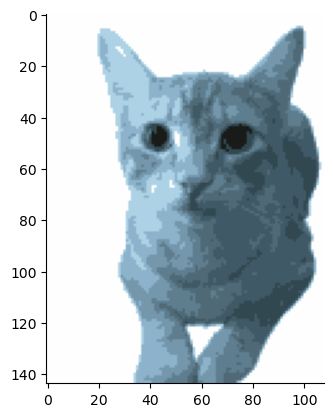

In [17]:
plt.imshow(vmap(vmap(oklab_to_linear_srgb))(manager.palette))

In [ ]:
ani = manager.draw_gif('bluecat.gif')
HTML(ani.to_jshtml())

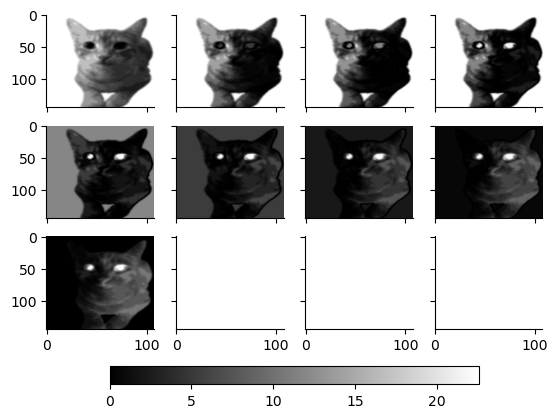

In [18]:
manager.show_loss_map()